# Testing DRFL algorithm

The purpose of this paper consists on testing about how is working the implemented algorithm.

This algorithm works with time series, taking as input a pd.Series data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from main import DRFL
import random


# Creating and Visualizing Easy Time-Series

Let's create a time series for detecting two target routines. Each routine will have a noise parameter (to give more realism) 

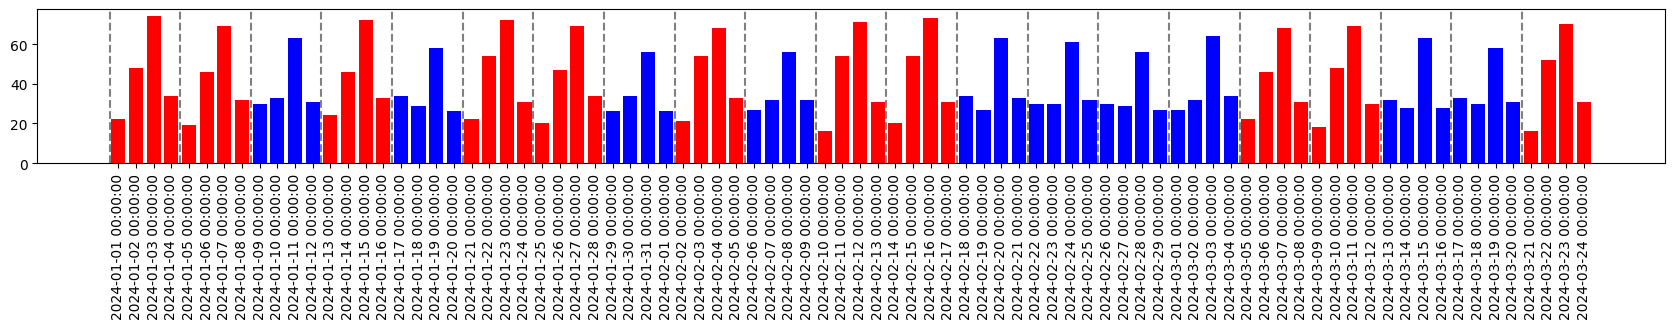

In [13]:
# PARAMS
target_routine_1 = [20, 50, 70, 30]
target_routine_2 = [30, 30, 60, 30]
noise_threshold_minutes = 4
T_max = 21
idx_routine1 = [0,1,3,5,6,8,10,11,16,17,20]

def randomized_routine(routine, noise_threshold):
    return [random.randint(x-noise_threshold, x+noise_threshold) for x in routine]

def get_colors(idx_routine):
    colores = []
    for x in range(T_max):
        if x in idx_routine:
            for y in range(len(target_routine_1)):
                colores.append("red")
        else:
            for y in range(len(target_routine_1)):
                colores.append("blue")
    return colores


time_series = []
for x in range(T_max):
    if x in idx_routine1:
        random_1 = randomized_routine(target_routine_1, noise_threshold_minutes)
        for y in random_1:
            time_series.append(y)
    else:
        random_2 = randomized_routine(target_routine_2, noise_threshold_minutes)
        for y in random_2:
            time_series.append(y)
            
time_series = np.array(time_series)

# Plotting the bar chart with vertical lines every 4 bars
plt.figure(figsize=(T_max,2))
bars = plt.bar(x=[x for x in range(len(time_series))], height=time_series, color=get_colors(idx_routine1))

# Draw a vertical line every four bars
for i in range(0, len(time_series), len(target_routine_1)):
    plt.axvline(x=i-0.5, color='grey', linestyle='--')
plt.xticks(ticks=[x for x in range(len(time_series))], labels=pd.date_range(start="2024-01-01", periods=len(time_series)),
           rotation=90)
plt.show()

Reds owns to the routine target 1, and blues owns to routine target 2

In [14]:
time_series = pd.DataFrame(
    {
        "Date": pd.date_range(start="2024-01-01", periods=len(time_series)),
        "Time-Series": time_series
    }
).set_index("Date")["Time-Series"]

# Testing DRFL with OVERLAP (epsilon = 1)

Now that we have synthetised data, lets detect the routines with DRFL algorithm:

We'll use as fixed param: 
m = 4


In [15]:
routine_detector = DRFL(m=4, R=10, C=5, G=50, epsilon=1)
routine_detector.fit(time_series)
routine_detector.show_results()

Routines detected:  8
__________________________________________________
Centroid 1: [20.4 49.7 70.5 32. ]
Routine 1: [array([22, 48, 74, 34]), array([19, 46, 69, 32]), array([24, 46, 72, 33]), array([22, 54, 72, 31]), array([20, 47, 69, 34]), array([21, 54, 68, 33]), array([16, 54, 71, 31]), array([20, 54, 73, 31]), array([22, 46, 68, 31]), array([18, 48, 69, 30])]
Date 1: [Timestamp('2024-01-01 00:00:00'), Timestamp('2024-01-05 00:00:00'), Timestamp('2024-01-13 00:00:00'), Timestamp('2024-01-21 00:00:00'), Timestamp('2024-01-25 00:00:00'), Timestamp('2024-02-02 00:00:00'), Timestamp('2024-02-10 00:00:00'), Timestamp('2024-02-14 00:00:00'), Timestamp('2024-03-05 00:00:00'), Timestamp('2024-03-09 00:00:00')]

 -------------------------------------------------- 

Centroid 2: [30.7 19.8 50.1 70.1]
Routine 2: [array([34, 19, 46, 69]), array([31, 24, 46, 72]), array([26, 22, 54, 72]), array([31, 20, 47, 69]), array([26, 21, 54, 68]), array([32, 16, 54, 71]), array([31, 20, 54, 73]), array(

# Testing DRFL with less Overlap (epsilon=0.5)

We see overlapping, so let's reduce the epsilon param to 0.5

In [16]:
routine_detector = DRFL(m=4, R=5, C=5, G=50, epsilon=0.5)
routine_detector.fit(time_series)
routine_detector.show_results()
routines_detected = routine_detector.get_results()

Routines detected:  2
__________________________________________________
Centroid 1: [20.83333333 46.83333333 70.16666667 32.33333333]
Routine 1: [array([22, 48, 74, 34]), array([19, 46, 69, 32]), array([24, 46, 72, 33]), array([20, 47, 69, 34]), array([22, 46, 68, 31]), array([18, 48, 69, 30])]
Date 1: [Timestamp('2024-01-01 00:00:00'), Timestamp('2024-01-05 00:00:00'), Timestamp('2024-01-13 00:00:00'), Timestamp('2024-01-25 00:00:00'), Timestamp('2024-03-05 00:00:00'), Timestamp('2024-03-09 00:00:00')]

 -------------------------------------------------- 

Centroid 2: [30.77777778 30.         60.22222222 30.44444444]
Routine 2: [array([30, 33, 63, 31]), array([34, 29, 58, 26]), array([27, 32, 56, 32]), array([34, 27, 63, 33]), array([30, 30, 61, 32]), array([30, 29, 56, 27]), array([27, 32, 64, 34]), array([32, 28, 63, 28]), array([33, 30, 58, 31])]
Date 2: [Timestamp('2024-01-09 00:00:00'), Timestamp('2024-01-17 00:00:00'), Timestamp('2024-02-06 00:00:00'), Timestamp('2024-02-18 00:

In [17]:
estimated_target_1 = routines_detected[0]["Cent"]
print("ROUTINES 1")
print("TARGET 1: {}, ESTIMATED 1: {}, Maximum Distance 1: {}".format(
    target_routine_1, estimated_target_1, np.max(np.abs(np.array(target_routine_1)-estimated_target_1)
)))
print("REAL START TIME POINTS 1: {}, ESTIMATED START TIME POINTS 1: {} ".format(
    [x*4 for x in idx_routine1], routines_detected[0]["auxIndex"]
))

print("="*50)

estimated_target_2 = routines_detected[1]["Cent"]
print("ROUTINES 2")
print("TARGET 2: {}, ESTIMATED 2: {}, Maximum Distance 2: {}".format(
    target_routine_2, estimated_target_2, np.max(np.abs(np.array(target_routine_2)-estimated_target_2)
)))

print("REAL START TIME POINTS 2: {}, ESTIMATED START TIME POINTS 2: {} ".format(
    [x*len(target_routine_2) for x in range(21) if x not in idx_routine1], routines_detected[1]["auxIndex"]
))

ROUTINES 1
TARGET 1: [20, 50, 70, 30], ESTIMATED 1: [20.83333333 46.83333333 70.16666667 32.33333333], Maximum Distance 1: 3.1666666666666643
REAL START TIME POINTS 1: [0, 4, 12, 20, 24, 32, 40, 44, 64, 68, 80], ESTIMATED START TIME POINTS 1: [0, 4, 12, 24, 64, 68] 
ROUTINES 2
TARGET 2: [30, 30, 60, 30], ESTIMATED 2: [30.77777778 30.         60.22222222 30.44444444], Maximum Distance 2: 0.7777777777777786
REAL START TIME POINTS 2: [8, 16, 28, 36, 48, 52, 56, 60, 72, 76], ESTIMATED START TIME POINTS 2: [8, 16, 36, 48, 52, 56, 60, 72, 76] 
